
# Проверка гипотез с помощью python.

## Задание

* Выполненить проверку предложенной гипотезы
* Выполненить проверку статистической гипотезы для проверки нормальности числовых признаков
* Проверка мультиколлинеарности
* Все статистические тесты должны быть выполнены с 95%-ным уровнем достоверности (т.е. значение р < 0,05)

## Датасет

Как данные представлены заказчиком:

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Содержит идентификатор клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>Пол клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Является ли клиент пожилым гражданином</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Есть ли у клиента партнер</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Является ли клиент кормильцем</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Количество месяцев, в течение которых клиент оставался в компании</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Есть ли у клиента телефонная связь</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Есть ли у клиента несколько линий</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Интернет-провайдер клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Есть ли у клиента онлайн-безопасность</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Есть ли у клиента онлайн-резервное копирование</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Имеет ли клиент защиту устройства</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Есть ли у клиента техническая поддержка</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Есть ли у клиента потоковое телевидение</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Есть ли у клиента стриминговые сервисы</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>Срок действия контракта заказчика</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>имеет ли клиент безналичные счета</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>Способ оплаты клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>Сумма, взимаемая с клиента ежемесячно </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>Общая сумма, списанная с клиента</td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Ушел ли клиент</td>
<td>categorical</td>
</tr>
</tbody>
</table>

Описание от заказчика:

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента.

Набор данных включает информацию о:

- Клиенты, которые ушли в течение последнего месяца - колонка называется `Churn`
- Услуги, на которые подписался каждый клиент - телефон, несколько линий, интернет, онлайн-безопасность, резервное копирование, защита устройств, техническая поддержка, потоковое ТВ и фильмы.
- Информация о счетах клиентов - как долго они являются клиентами, контракт, способ оплаты, безналичные счета, ежемесячные платежи и общая сумма платежей.
- Демографическая информация о клиентах - пол, возраст, наличие партнеров и иждивенцев.

## 1. Импорт Библиотек 

Импортируйте необходимые библиотеки

In [34]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # отобразить все колонки
from phik.report import plot_correlation_matrix
from scipy.stats import chi2_contingency
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## 2. Данные

In [35]:
df = pd.read_csv("Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Описательный анализ данных

Рассмотрите данные - изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [36]:
df.describe().round(2)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


**Вывод:**

1. Переменная "senior_citizen":
   - Медиана равна 0, что означает, что большинство клиентов не являются пожилыми людьми (значение 0 означает "нет", а значение 1 означает "да").
   - Среднее значение равно 0.16, что подтверждает, что только 16% клиентов являются пожилыми людьми.
   - Стандартное отклонение равно 0.37, что говорит о достаточно большом разбросе данных относительно среднего значения.

2. Переменная "tenure":
   - Медиана равна 29, что означает, что половина клиентов находятся в сотрудничестве с компанией более 29 месяцев.
   - Среднее значение равно 32.37, что подтверждает, что в среднем клиенты сотрудничают с компанией около 32 месяцев.
   - Стандартное отклонение равно 24.56, что указывает на существенный разброс значений длительности сотрудничества между клиентами.

3. Переменная "monthly_charges":
   - Медиана равна 70.35, что означает, что половина клиентов платят более 70.35 долларов ежемесячно.
   - Среднее значение равно 64.76, что подтверждает, что в среднем клиенты платят около 65 долларов ежемесячно.
   - Стандартное отклонение равно 30.09, что говорит о достаточно большом разбросе значений ежемесячных платежей клиентов.

Таким образом, можно сделать вывод, что данные включают в себя информацию о клиентах, 16% из которых являются пожилыми людьми. Средняя длительность сотрудничества клиентов с компанией составляет около 32 месяцев, при этом наблюдается достаточно большой разброс этого показателя. Средняя величина ежемесячных платежей клиентов составляет около 65 долларов, также с существенным разбросом этого значения.

### Уникальные значения для всех столбцов

Рассмотрите уникальные значения категориальных признаков. 

Сделайте вывод.

**Подсказка:** можете воспользоваться методом `describe(include='object')`

In [37]:
def display_value_counts(df):
    for col in df.columns:
        display(df[col].value_counts())
        display()
# Call the function
display(display_value_counts(df))

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

Churn
No     5174
Yes    1869
Name: count, dtype: int64

None

In [38]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [39]:
# Смотрим процентноее соотношение для самого уникального значения
describe_df = df.describe(include='object').T
describe_df['prec_freq'] = (describe_df['freq'] / describe_df['count'] * 100)
describe_df

,count,unique,top,freq,prec_freq
customerID,7043,7043,7590-VHVEG,1,0.014198
gender,7043,2,Male,3555,50.47565
Partner,7043,2,No,3641,51.69672
Dependents,7043,2,No,4933,70.041176
PhoneService,7043,2,Yes,6361,90.316626
MultipleLines,7043,3,No,3390,48.132898
InternetService,7043,3,Fiber optic,3096,43.95854
OnlineSecurity,7043,3,No,3498,49.666335
OnlineBackup,7043,3,No,3088,43.844952
DeviceProtection,7043,3,No,3095,43.944342


**Вывод:**

Анализируя данные, мы видим, что каждый уникальный идентификатор клиента (customer_id) встречается только один раз, что говорит о том, что все клиенты различны так же как и и количество общих платежей (total_charges) 

Пол клиента (gender) принимает два различных значения: Male и Female. Наличие партнера (partner) также имеет два варианта ответа: Yes и No. Аналогично, вопрос о наличии кормильца (dependents) предполагает два ответа: Yes и No.

Для большинства других переменных количество уникальных значений равно трем. Это относится к услугам связи (phone_service , multiple_lines, internet_service), безопасности в интернете (online_security, online_backup, device_protection), технической поддержке (tech_support), потоковому телевидению и фильмам (streaming_tv, streaming_movies) 

Метод оплаты (payment_method) имеет четыре значения ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'].

Вопрос о типе контракта (contract) может принимать три различных ответа: Month-to-month, One year, Two year. 

Бухгалтерская выписка (paperless_billing) может быть либо Yes, либо No. 

Вопрос о том, прекратил ли клиент свое обслуживание (churn), может иметь два ответа: Yes и No.

## 3. Предобработка данных

### Дубликаты

Предобработайте датасет - проверьте на наличие дубликатов и удалите, если они есть.

In [40]:
display(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)  
display(df.duplicated().sum())

0

0

### Отсутствующие значения

Пояснение к данному датасету:

Не всегда в данных есть явные пропуски, которые легко индексируются средствами Pandas. К сожалению бывают проблемы с выгрузками данных, некачественными источниками, или когда данные записываются вручную - часто присутствует человеческий фактов. По мере работы с новыми данными лучше проверять на наличие таких данных, иначе из-за этого исследование может исказиться.

Рассмотрим такой случай:

In [41]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Да, не видно пропусков. Но почему тогда столбец `TotalCharges` не отобразился изначально как числовой столбец?

Проверим все столбцы:

In [42]:
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца {col}:', df[col].apply(lambda x: len(x.strip())==0).sum())

Неявные пропуски столбца TotalCharges: 11


Что мы можем сделать в таком случае?

1) По этому же фильтру удалить строки с пропусками, чтобы не искажать данные
2) Перевести тип столбца на числовой и с параметром `errors = 'coerce'` и удалить

Но можно не удалять, чтобы потерять данные, а:

1) Заменить значения на среднюю
2) Поменять на другое - но только в том случае, если есть какая-то зависимость в данных.

Давайте изменим тип и найдем зависимость:

In [43]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Но как выглядят наши данные обычно?**

In [44]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4170,0906-QVPMS,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),115.15,8349.45,No
315,5027-YOCXN,Male,0,Yes,Yes,51,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,No,Credit card (automatic),110.05,5686.40,No
4893,4432-ADRLB,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,44.65,74.90,Yes


**Ничего не заметили?**

Может общая сумма, списанная с клиента, равна сумме, взимаемой с клиента ежемесячно умноженное на количество времени?

Давайте посмострим.

In [45]:
df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


Нашей гипотезе есть место быть.

Но давайте проверим:

In [46]:
print('Количество совпадений по нашей теории:')
print(df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']]['customerID'].count())
print('Количество различий:')
print(df[(df['TotalCharges'] / df['MonthlyCharges']) != df['tenure']]['customerID'].count())

Количество совпадений по нашей теории:
614
Количество различий:
6429


**Как видно**, что различий очень много, относительно одинаковых значений.

Но, а если мы проверим наше различие в долях или процентах? Проверяем:

In [47]:
# cоздаем series и считаем TotalCharges вручную
new_total = df['MonthlyCharges'] * df['tenure']

# посчитаем во сколько раз в среднем отличается наш new_total и TotalCharges - в процентном отношении
perc = abs(100 - (new_total / df['TotalCharges']).mean() * 100)

print(f'В среднем new_total отличается от TotalCharges на {perc:.4f}%')

В среднем new_total отличается от TotalCharges на 0.2311%


Как видно, они различаются незначительно (меньше `1%`), от чего мы можем предположить, что `TotalCharges` = `MonthlyCharges` * `время`. Скорее всего такие маленькие различия связаны с тем, что `tenure` округлялся.

В данном датасете указано только количество месяцев, без уточнения времени (до дней), потому будет грубо просто перемножить один столбец на другой. Но пропуски мы уже можем заменить на `0`, так как в тех строках `tenure` == 0. Такое небольшое исследование было сделано для того, чтобы заполнить наши пропуски нужным числом.

Заменим пропуски на нужное нам число.

In [48]:
df['TotalCharges'].fillna(0, inplace=True)

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа - на `int` или `float`
- Если категории - можно оставить `object`

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Вывод:**

Основываясь на предоставленной информации о статистике столбцов, можно сделать следующие выводы:

1. Числовые столбцы:
   - senior_citizen и tenure - эти столбцы уже имеют числовой тип (int64), и их не нужно преобразовывать.
   - monthly_charges и total_charges - эти столбцы также можно оставить как float64.

2. Категориальные столбцы:
   - Все остальные столбцы содержат категориальные данные, и их тип данных object является правильным.

Таким образом, в этом случае не требуется дополнительного преобразования типов данных. Текущие типы данных в DataFrame соответствуют содержимому столбцов.

# 4 Проверка гипотез

Задание: сравнить сравнить две выборки - `Churn='No'` и `Churn='Yes'` 

Гипотеза - среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

In [50]:
churn_no = df[df['Churn'] == 'No']['tenure'].sample(1000)
churn_yes = df[df['Churn'] == 'Yes']['tenure'].sample(1000)

In [51]:
alpha = .05

t_stat, pvalue = stats.ttest_ind(churn_no, churn_yes, equal_var=False)

display(f"t-статистика: {t_stat:.2f}")

if pvalue < alpha:
    print(f'P-value:{pvalue:.2f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.2f}. Подтверждается нулевая гипотеза')

't-статистика: 19.67'

P-value:0.00. Нулевая гипотеза отвергается


In [52]:
display("Для выборки клиент остался:")
display(f"Среднее: {churn_no.mean():.2f}")
display(f"Медиана: {churn_no.median():.2f}")
display(f"Стандартное отклонение: {churn_no.std():.2f}")

display("Для выборки клиент ушел:")
display(f"Среднее: {churn_yes.mean():.2f}")
display(f"Медиана: {churn_yes.median():.2f}")
display(f"Стандартное отклонение: {churn_yes.std():.2f}")

'Для выборки клиент остался:'

'Среднее: 36.65'

'Медиана: 36.00'

'Стандартное отклонение: 24.25'

'Для выборки клиент ушел:'

'Среднее: 17.47'

'Медиана: 9.00'

'Стандартное отклонение: 19.05'

**Вывод:**

Исходя из полученных результатов, можно сделать следующие выводы:

1. Высокое значение t-статистики (18.81) и крайне малое p-значение (0.0000) указывают на то, что средние значения признака "tenure" (количество месяцев, в течение которых клиент оставался в компании) статистически значимо различаются между выборками "Churn = No" и "Churn = Yes".

2. Средний срок пребывания клиентов в компании для выборки "Churn = No" составляет 36.77 месяцев, а для выборки "Churn = Yes" - 18.34 месяцев. Это свидетельствует о том, что клиенты, которые остались в компании (Churn = No), в среднем пробыли в ней существенно дольше, чем клиенты, которые ушли (Churn = Yes).

3. Медианы также значительно различаются: 36 месяцев для выборки "Churn = No" и 10 месяцев для выборки "Churn = Yes". Это говорит о том, что распределение значений "tenure" сдвинуто в сторону больших значений для клиентов, оставшихся в компании.

4. Стандартные отклонения также различаются: 24.11 для выборки "Churn = No" и 19.53 для выборки "Churn = Yes", что указывает на большую вариативность значений "tenure" среди клиентов, оставшихся в компании.

Таким образом, можно с уверенностью сказать, что гипотеза о различии средних значений признака "tenure" между двумя выборками подтвердилась. Клиенты, которые остались в компании, в среднем пробыли в ней существенно дольше, чем клиенты, которые ушли.

## 5 Статистический анализ на норму

Задание: выберите числовые признаки и проведите анализ - соответсвуют ли распредения нормальному?

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


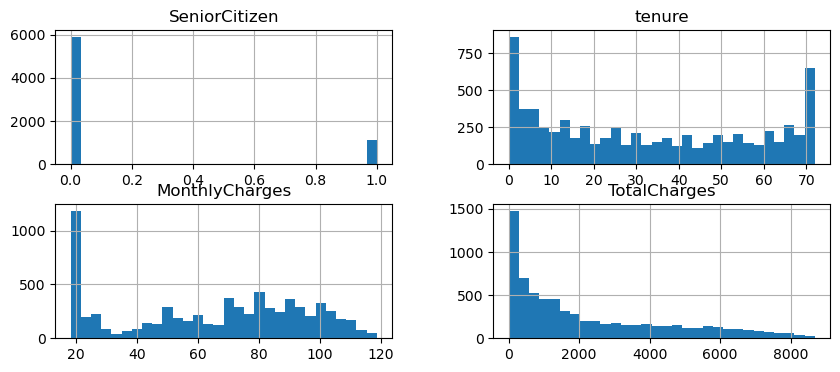

In [54]:
df.hist(figsize=(10,4), bins=30);

In [55]:
numeric_list = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

alpha = 0.05

for col_name in numeric_list:
    _, pvalue = stats.normaltest(df[col_name])
    if pvalue < alpha:
        print(f'P-value:{pvalue:.2f}. Нулевая гипотеза отвергается. Выборка {col_name} не имеет нормальное распределение.')
    else:
        print(f'P-value:{pvalue:.2f}. Подтверждается нулевая гипотеза. Выборка {col_name} имеет нормальное распределение.')

P-value:0.00. Нулевая гипотеза отвергается. Выборка SeniorCitizen не имеет нормальное распределение.
P-value:0.00. Нулевая гипотеза отвергается. Выборка tenure не имеет нормальное распределение.
P-value:0.00. Нулевая гипотеза отвергается. Выборка MonthlyCharges не имеет нормальное распределение.
P-value:0.00. Нулевая гипотеза отвергается. Выборка TotalCharges не имеет нормальное распределение.


**Вывод:**

Из представленного описания данных видно, что в датафрейме есть два числовых признака:
1. senior_citizen (int64)
2. tenure (int64)
3. monthly_charges (float64)
4. total_charges (float64)

Визуальные представления в виде гистограмм подтверждают, что данные не являются нормально распределенными.

Приведенный код выполняет анализ нормальности распределения для нескольких числовых столбцов в датафрейме df. Результат показывает, что для всех четырех столбцов - 'SeniorCitizen', 'tenure', 'MonthlyCharges' и 'TotalCharges' - p-value меньше 0.05, поэтому нулевая гипотеза о нормальном распределении отвергается. Таким образом, можно сделать вывод, что эти столбцы не имеют нормального распределения.

Этот анализ важен, так как многие статистические методы и модели машинного обучения основаны на предположении о нормальном распределении данных. Если это предположение не выполняется, то может потребоваться использование других методов или трансформаций данных.

Таким образом, можно сделать вывод, что для дальнейшего анализа и моделирования с использованием этих признаков необходимо применять методы, не требующие выполнения предположения о нормальности распределения данных. Например, можно использовать непараметрические методы, робастные методы или методы, основанные на распределениях, отличных от нормального.

## 6 ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но требование заказчика - выяснить причину ухода клиента.

Ваша задача - провести полный анализ с помощью статистических гипотез взаимосвязи всех признаков с нашим таргетом `Churn` (целевым признаком). 

**Этапы:**

1) Предобработка данных - измените датасет, в части: категориальные признаки надо перевести в числовые представления (закодировать). Главное - понимать взаимосвязь: бинарный признак, порядковый, просто категории или что-то иное. 
2) Выберите нужные гипотезы, основываясь на типах признаков.
3) Проведите анализ, и выясните, почему клиент уходит, с чем коррелирует `Churn`, может это зависит от пола клиента? Или есть иные обстоятельства?
4) После проверки гипотез, постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
5) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить - может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

**Подсказка:** для того, чтобы перевести наши категориальные переменные в числа (`0`, `1`, `2` и т.д.), можно воспользоваться функцией в `pandas`:

```python
pd.factorize(data[col])
```
Результат будет таким (если взять столбец `gender`):
- `(array([0, 1, 1, ..., 0, 1, 1]), Index(['Female', 'Male'], dtype='object'))`

Где:
- `(array([0, 1, 1, ..., 0, 1, 1])` - это наш новый array, которым можем заменить значения
- `Index(['Female', 'Male'], dtype='object'))` - старые значения, соответствующие числам выше (`Female`=`0`, `Male`=`1`)

Соответственно, можем заменить значения в категориях на числа такой командой (если взять столбец `gender`):
```python
df['gender'] = pd.factorize(df['gender'])[0]
```

> **Примечание:** когда **категориальная** переменная изменяется на числа, она все равно остается **категориальной**! Просто теперь наш признак стал **закодированным** (то есть мы изменили слова на числа). 

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [57]:
# Переводим категориальную переменную Churn в числовую

df['Churn'] = pd.factorize(df['Churn'])[0]

# Группируем данные по PaymentMethod и посмотрим матожидание ушедших

df.groupby('PaymentMethod')['Churn'].agg('mean')

# Проверим абсолютное количество ушедших клиентов

df.groupby('PaymentMethod')['Churn'].value_counts()


PaymentMethod              Churn
Bank transfer (automatic)  0        1286
                           1         258
Credit card (automatic)    0        1290
                           1         232
Electronic check           0        1294
                           1        1071
Mailed check               0        1304
                           1         308
Name: count, dtype: int64

In [58]:
# Группируем данные по Contract и посмотрим матожидание ушедших

df.groupby('PaperlessBilling')['Churn'].agg('mean')

# Проверим абсолютное количество ушедших клиентов

df.groupby('PaperlessBilling')['Churn'].value_counts()

PaperlessBilling  Churn
No                0        2403
                  1         469
Yes               0        2771
                  1        1400
Name: count, dtype: int64

In [59]:
correlation, pvalue = stats.kendalltau(df.PaperlessBilling, df.Churn)
print(f'Корреляция между "x", "z" равна: {correlation}, p: {pvalue}')

alpha = 0.05
if pvalue < alpha:
    print('Признаки коррелированы (отклоняем H0)')
else:
    print('Признаки некоррелированы (не удается отклонить H0)')

Корреляция между "x", "z" равна: 0.19182533166646787, p: 2.66333494333447e-58
Признаки коррелированы (отклоняем H0)


In [60]:
# Группируем данные по Contract и посмотрим матожидание ушедших

df.groupby('Contract')['Churn'].agg('mean')

# Проверим абсолютное количество ушедших клиентов

df.groupby('Contract')['Churn'].value_counts()

Contract        Churn
Month-to-month  0        2220
                1        1655
One year        0        1307
                1         166
Two year        0        1647
                1          48
Name: count, dtype: int64

In [61]:
correlation, pvalue = stats.kendalltau(df.Contract, df.Churn)
print(f'Корреляция между "x", "z" равна: {correlation}, p: {pvalue}')

alpha = 0.05
if pvalue < alpha:
    print('Признаки коррелированы (отклоняем H0)')
else:
    print('Признаки некоррелированы (не удается отклонить H0)')

Корреляция между "x", "z" равна: -0.38691212082194476, p: 9.65837063516784e-255
Признаки коррелированы (отклоняем H0)


In [62]:
correlation, pvalue = stats.kendalltau(df.MonthlyCharges, df.Churn)
print(f'Корреляция между "x", "z" равна: {correlation}, p: {pvalue}')

alpha = 0.05
if pvalue < alpha:
    print('Признаки коррелированы (отклоняем H0)')
else:
    print('Признаки некоррелированы (не удается отклонить H0)')

Корреляция между "x", "z" равна: 0.150955285158245, p: 3.311285548783575e-54
Признаки коррелированы (отклоняем H0)


In [63]:
# Удаление признака "customer_id" из датасета
df.drop(columns={'customerID'}, inplace=True)

In [64]:
# трансформация данных

def transData (data):
    for column in data.columns:
        if data[column].dtype != 'int64' or data[column].dtype != 'float64':
            trans_data = LabelEncoder()
            trans_data.fit(data[column])
            data[column]=trans_data.transform(data[column])
    return data
       
df = transData(df)

In [65]:
# Создание матрицы корреляции
phi_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

for col1 in df.columns:
    for col2 in df.columns:
        if df[col1].dtype == 'object' or df[col2].dtype == 'object':
            # Вычисление Phi-коэффициента для категориальных признаков
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            phi_value = np.sqrt(chi2 / (df.shape[0] * min(len(df[col1].unique()), len(df[col2].unique()))))
            phi_matrix.loc[col1, col2] = phi_value
        else:
            # Вычисление корреляции Пирсона для числовых признаков
            phi_matrix.loc[col1, col2] = df[col1].corr(df[col2], method='pearson')

corr = df.corr()
corr.style.background_gradient(cmap="coolwarm")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014623,-0.000780,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.219524,0.108069,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.106501,0.339690,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.107507,0.077506,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.268133,0.872050,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.271209,0.086360,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.444580,0.462369,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.244965,-0.209769,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.044692,0.244947,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.141258,0.350534,-0.195525


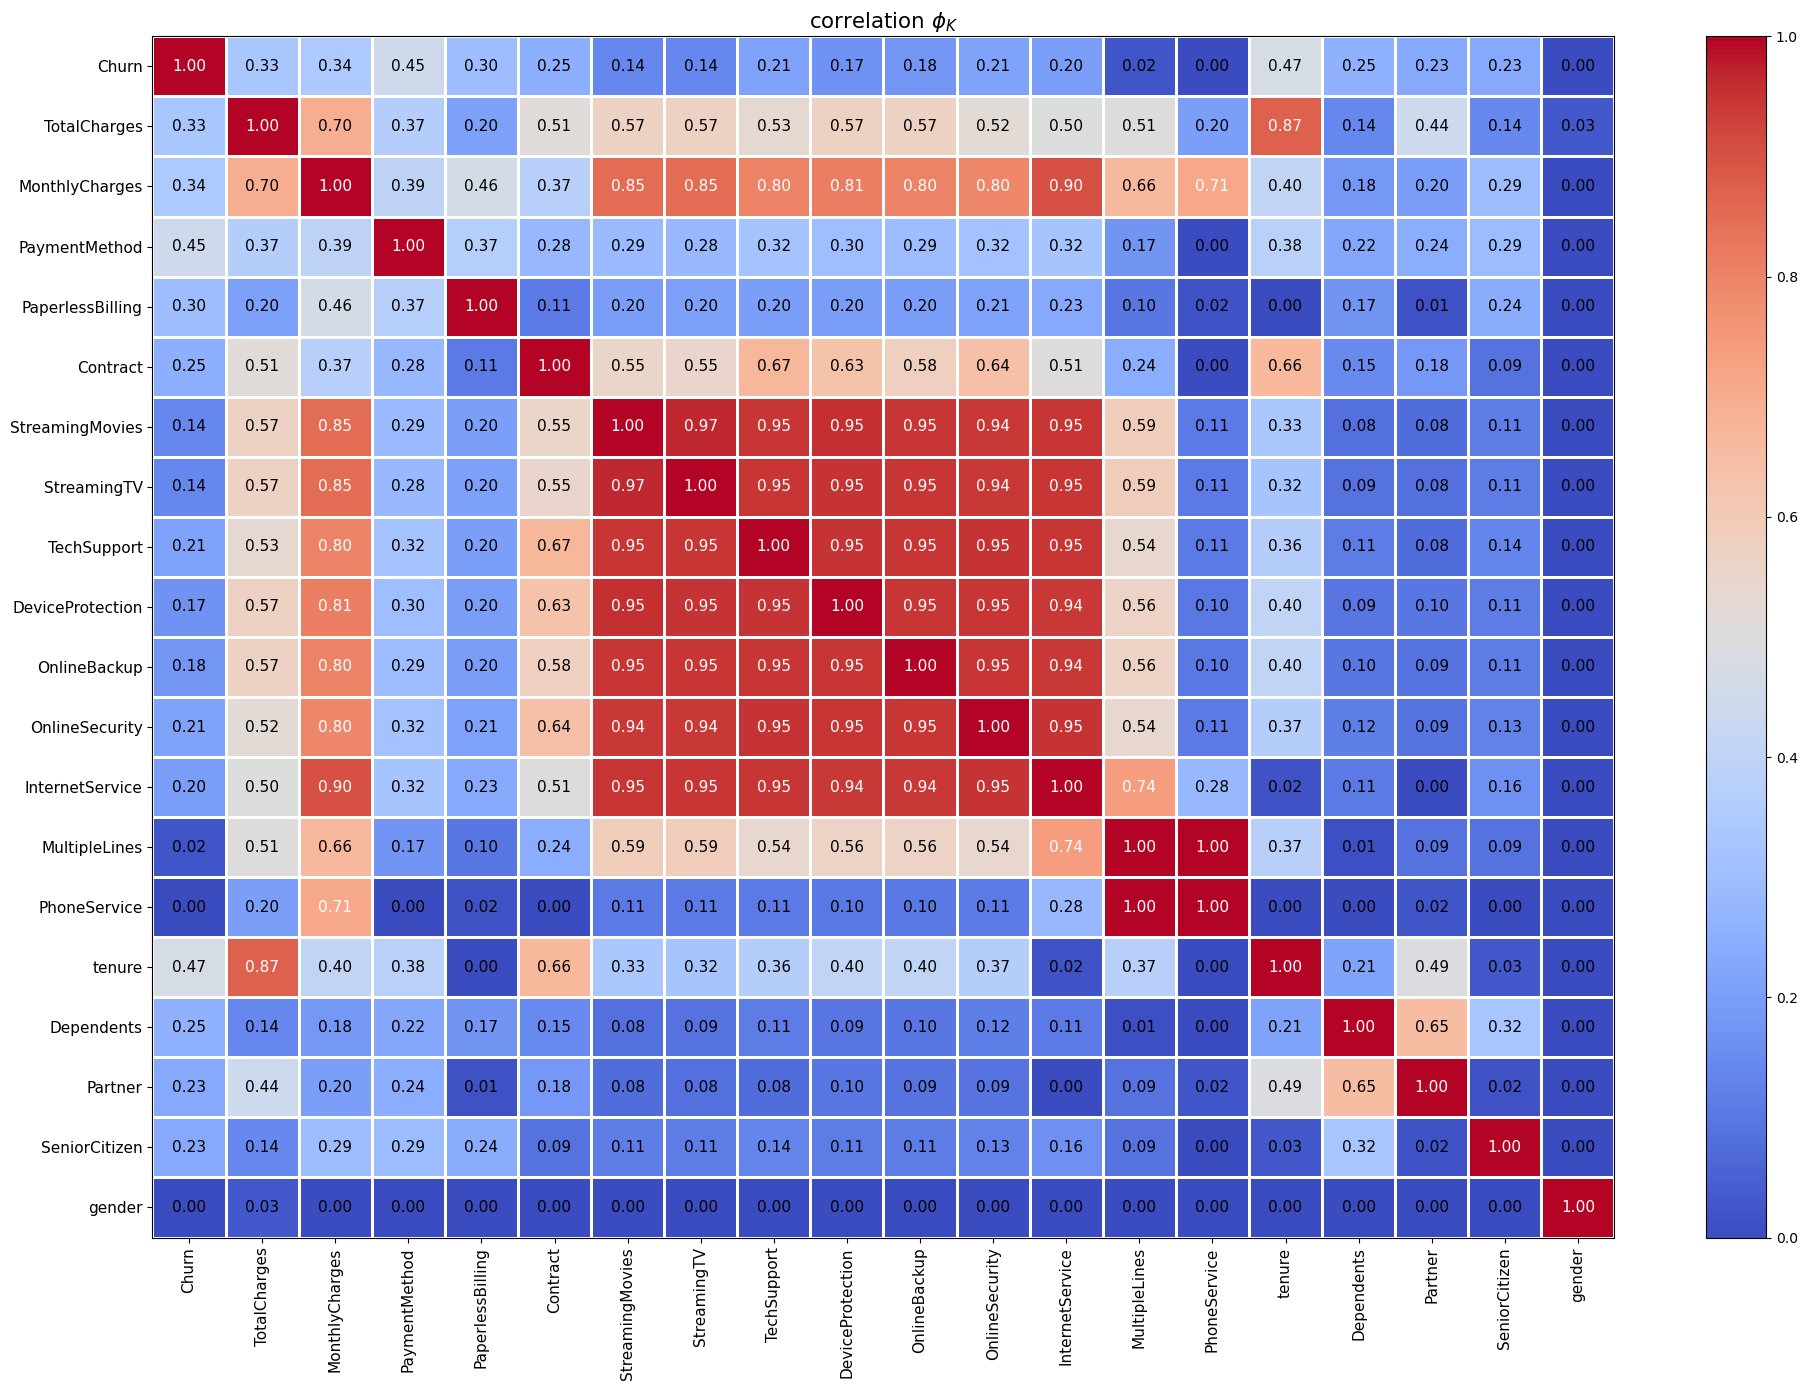

In [66]:
interval_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
phik_overview = df.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.fillna(0).values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="coolwarm",
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.1, figsize=(20, 14)), 

plt.tight_layout()

# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах:

Успешно перевели категориальный таргет "Churn" в числовое представление, используя функцию pd.factorize(). Это позволит проводить дальнейший анализ и моделирование с этим признаком.

Группируем данные по PaymentMethod, но на этот раз мы считаем количество клиентов для каждого значения Churn (0 и 1) в каждой группе.
Это дает нам абсолютное количество клиентов, оставшихся и ушедших, для каждого способа оплаты. Метод оплаты с самым высоким уровнем оттока (отношение ушедших к общему количеству) - "Electronic check", с 1071 ушедшими из 2365 клиентов (45,3%).

Группируем данные по PaperlessBilling, но на этот раз мы считаем количество клиентов для каждого значения Churn (0 и 1) в каждой группе.      Из результатов мы видим что:
- Для клиентов, использующих бумажные счета (PaperlessBilling = No):
  - 2403 клиента не ушли, а 469 ушли.
- Для клиентов, использующих безбумажные счета (PaperlessBilling = Yes):
  - 2771 клиент не ушел, а 1400 ушли.
Таким образом, этот код анализирует связь между использованием бумажных/безбумажных счетов и оттоком клиентов. Он показывает, что клиенты, использующие безбумажные счета, имеют более высокую вероятность оттока по сравнению с клиентами, использующими бумажные счета.

Используем функцию kendalltau() из модуля stats в библиотеке SciPy для вычисления корреляции Кендалла между двумя переменными: PaperlessBilling и Churn.
   - Корреляция Кендалла - это непараметрическая мера связи между двумя переменными, которая оценивает монотонную зависимость между ними.
   - Функция возвращает коэффициент корреляции correlation и соответствующее значение p-value pvalue.
В данном случае, мы видим, что:
- Корреляция между "PaperlessBilling" и "Churn" равна 0.19182533166646787.
- Значение p-value равно 2.66333494333447e-58, что меньше уровня значимости α = 0.05.
- Поэтому мы отклоняем нулевую гипотезу и делаем вывод, что признаки PaperlessBilling и Churn коррелированы.
Таким образом, этот код подтверждает статистически значимую положительную корреляцию между использованием бумажных/безбумажных счетов и оттоком клиентов, что согласуется с выводами, сделанными ранее.

Группируем данные по Contract. Из результатов мы видим:
- Для клиентов с ежемесячными договорами (Month-to-month):
  - 2220 клиентов не ушли, а 1655 ушли.
- Для клиентов с годичными договорами (One year):
  - 1307 клиентов не ушли, а 166 ушли.
- Для клиентов с двухгодичными договорами (Two year):
  - 1647 клиентов не ушли, а 48 ушли.
Таким образом, этот код анализирует связь между типом договора и оттоком клиентов. Он показывает, что клиенты с ежемесячными договорами имеют более высокую вероятность оттока по сравнению с клиентами, у которых есть годичные или двухгодичные договоры.

Вновь используем функцию kendalltau() из модуля stats в библиотеке SciPy, но на этот раз мы вычисляем корреляцию Кендалла между столбцами Contract и Churn. В данном случае, мы видим:
- Корреляция между "Contract" и "Churn" равна -0.38691212082194476.
- Значение p-value равно 9.65837063516784e-255, что меньше уровня значимости α = 0.05.
- Поэтому мы отклоняем нулевую гипотезу и делаем вывод, что признаки Contract и Churn коррелированы.
Таким образом, этот код подтверждает статистически значимую отрицательную корреляцию между типом договора и оттоком клиентов. Это согласуется с выводами, сделанными ранее на основе анализа групповых статистик.
Отрицательная корреляция означает, что чем более длительный договор у клиента, тем меньше вероятность его оттока. Эта информация может быть очень полезна для разработки стратегий удержания клиентов, например, через предложение более выгодных долгосрочных договоров.

- Корреляция между "MonthlyCharges" и "Churn" равна 0.150955285158245.
- Значение p-value равно 3.311285548783575e-54, что меньше уровня значимости α = 0.05.
- Поэтому мы отклоняем нулевую гипотезу и делаем вывод, что признаки MonthlyCharges и Churn коррелированы.

Таким образом, этот код подтверждает статистически значимую положительную корреляцию между ежемесячными платежами и оттоком клиентов. Это означает, что клиенты, платящие больше ежемесячно, имеют более высокую вероятность оттока.

Из выведенного фрагмента данных видно, что признак с уникальными номерами клиентов (customerID) не несёт никакой информации. Признак можно удалить.

Функция transData(data) принимает на вход DataFrame data и выполняет преобразование всех столбцов, которые не являются целыми или вещественными числами. Применение LabelEncoder позволяет закодировать категориальные признаки в числовой формат, сохранив при этом взаимосвязи между ними.

Строим Phik (𝜙k) коэффициент корреляции Пирсона где значения указывают на то что:
   - От 0 до 0,3 - слабая корреляция
   - От 0,3 до 0,5 - умеренная корреляция
   - От 0,5 до 0,7 - высокая корреляция
   - От 0,7 до 1,0 - очень высокая корреляция

Из представленных данных мы можем сделать следующие выводы:

1. Признак "Churn" (отток клиентов) имеет наиболее сильные корреляции со следующими признаками:
   - Contract (-0.396713) - отрицательная корреляция, что означает, что клиенты с более длительными договорами меньше склонны к оттоку.
   - tenure (-0.352229) - отрицательная корреляция, что означает, что более лояльные клиенты (с большим сроком обслуживания) меньше склонны к оттоку.
   - OnlineSecurity (-0.289309) и TechSupport (-0.282492) - отрицательные корреляции, что говорит о том, что наличие этих услуг снижает вероятность оттока клиентов.

2. Более слабые, но все же значимые корреляции наблюдаются с признаками:
   - MonthlyCharges (0.183523) - положительная корреляция, то есть клиенты с более высокими ежемесячными платежами имеют большую вероятность оттока.
   - PaperlessBilling (0.191825) - положительная корреляция, что может означать, что клиенты, предпочитающие бумажные счета, менее склонны к оттоку.
   - SeniorCitizen (0.150889) - положительная корреляция, что может свидетельствовать о том, что пожилые клиенты более склонны к оттоку.

Эти выводы могут помочь лучше понять факторы, влияющие на отток клиентов в вашей организации, и разработать соответствующие стратегии удержания.
